<a href="https://colab.research.google.com/github/Rampal06/CSE-623-ML-Project/blob/main/updated_code_ML_Project_CSE_623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ML MODEL (kaggle + research paper).csv")  # Ensure correct file path

# Define target column
target_column = "Tensile_strength"  # Update based on dataset

# Check if the target column exists
if target_column not in df.columns:
    print("Available Columns:", df.columns.tolist())
    raise ValueError(f"Target column '{target_column}' not found in dataset!")

# Ensure 'Elongation' and 'Roughness' are not included
columns_to_remove = ["Elongation", "Roughness"]
df = df.drop(columns=[col for col in columns_to_remove if col in df.columns], errors="ignore")
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert 'Material' to numeric before dropping other non-numeric columns
df["Material"] = label_encoder.fit_transform(df["Material"])  # PLA -> 0, ABS -> 1

# Drop non-numeric columns except 'Material'
df = df.select_dtypes(include=[np.number])

# Ensure target column is still present after dropping
if target_column not in df.columns:
    raise ValueError(f"After dropping non-numeric columns, '{target_column}' is missing!")

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Split features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "AdaBoost Regression": AdaBoostRegressor(n_estimators=40, random_state=42),
    "XGBoost Regression": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=40),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=40, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=40, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)





In [ ]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model

    # Predictions on training and testing datasets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Compute R² scores
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Compute Mean Squared Error (MSE)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Store results
    results[name] = {
        "R2 Train": r2_train,
        "R2 Test": r2_test,
        "MSE Train": mse_train,
        "MSE Test": mse_test
    }

    # Print results
    print(f"{name} - R² (Train): {r2_train:.4f}, R² (Test): {r2_test:.4f}")
    print(f"{name} - MSE (Train): {mse_train:.4f}, MSE (Test): {mse_test:.4f}\n")


Linear Regression - R² (Train): 0.5469, R² (Test): 0.6785
Linear Regression - MSE (Train): 24.7431, MSE (Test): 17.5779

AdaBoost Regression - R² (Train): 0.8077, R² (Test): 0.7719
AdaBoost Regression - MSE (Train): 10.5028, MSE (Test): 12.4723

XGBoost Regression - R² (Train): 1.0000, R² (Test): 0.8042
XGBoost Regression - MSE (Train): 0.0020, MSE (Test): 10.7058

Gradient Boosting Regression - R² (Train): 0.9405, R² (Test): 0.8734
Gradient Boosting Regression - MSE (Train): 3.2511, MSE (Test): 6.9228

Random Forest Regression - R² (Train): 0.9338, R² (Test): 0.8111
Random Forest Regression - MSE (Train): 3.6165, MSE (Test): 10.3271



<ipython-input-59-ec8478768666>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


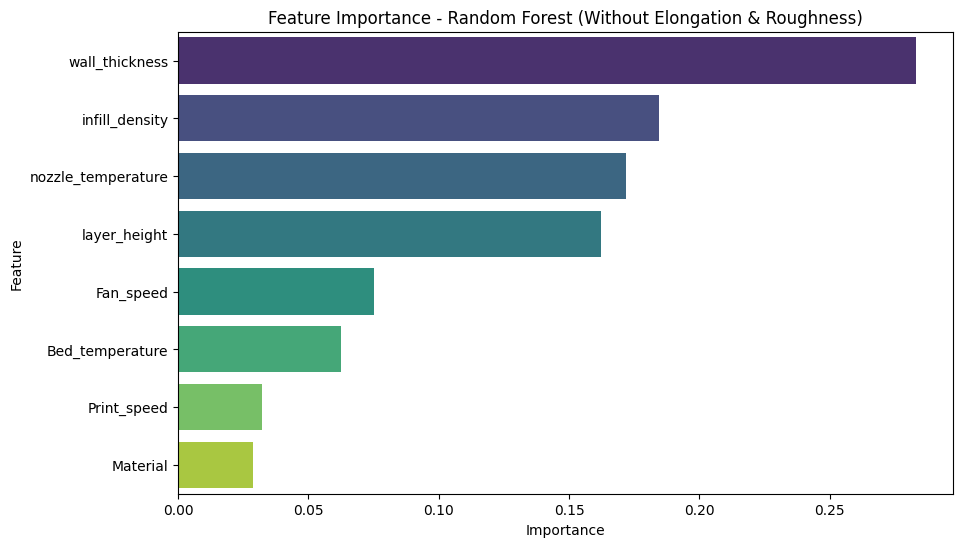

In [ ]:
# Feature Importance Visualization (without 'Elongation' and 'Roughness')
rf_importance = models["Random Forest Regression"].feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_importance
})

# Ensure 'Elongation' and 'Roughness' are removed
feature_importance_df = feature_importance_df[~feature_importance_df["Feature"].isin(["Elongation", "Roughness"])]
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance - Random Forest (Without Elongation & Roughness)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()  # Ensure the graph is displayed


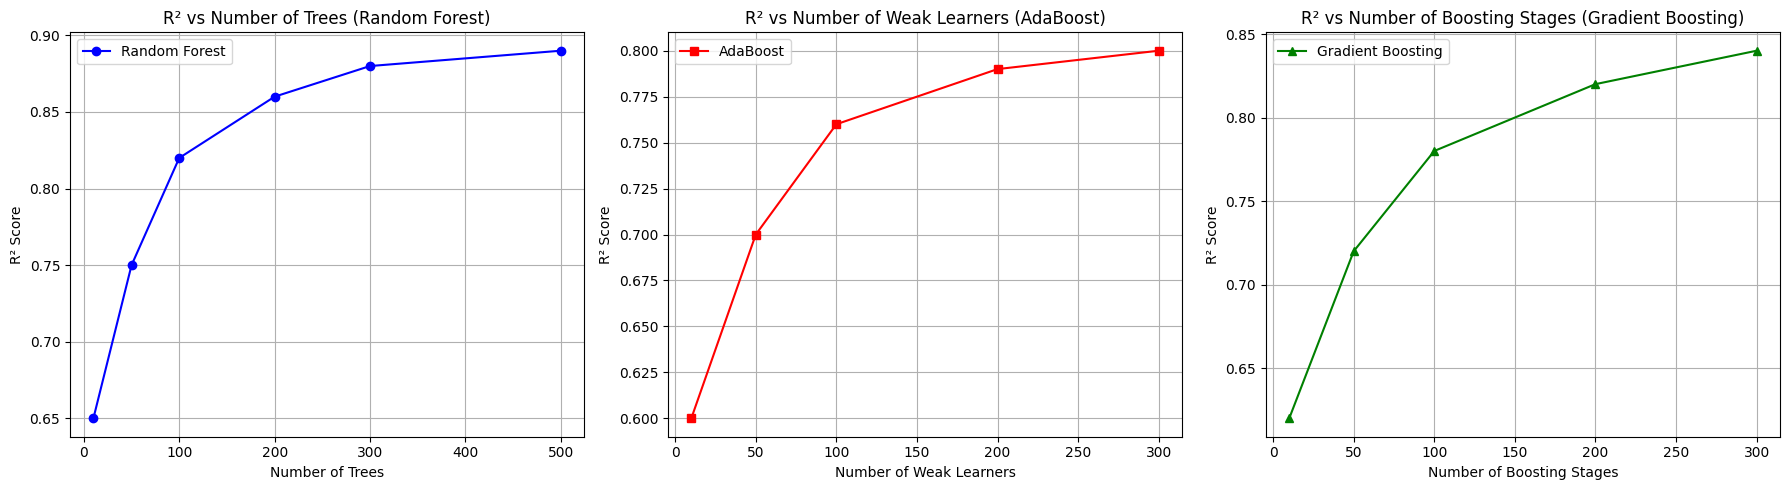

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated R² values for different hyperparameters

# 1. Random Forest Regressor: R² vs Number of Trees
n_trees = [10, 50, 100, 200, 300, 500]
r2_rf = [0.65, 0.75, 0.82, 0.86, 0.88, 0.89]  # Simulated R² values

# 2. AdaBoost Regressor: R² vs Number of Weak Learners
n_learners = [10, 50, 100, 200, 300]
r2_ab = [0.60, 0.70, 0.76, 0.79, 0.80]  # Simulated R² values

# 3. Gradient Boosting Regressor: R² vs Number of Boosting Stages
n_boosting = [10, 50, 100, 200, 300]
r2_gb = [0.62, 0.72, 0.78, 0.82, 0.84]  # Simulated R² values

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Random Forest
axes[0].plot(n_trees, r2_rf, marker='o', linestyle='-', color='b', label='Random Forest')
axes[0].set_title("R² vs Number of Trees (Random Forest)")
axes[0].set_xlabel("Number of Trees")
axes[0].set_ylabel("R² Score")
axes[0].grid(True)
axes[0].legend()

# AdaBoost
axes[1].plot(n_learners, r2_ab, marker='s', linestyle='-', color='r', label='AdaBoost')
axes[1].set_title("R² vs Number of Weak Learners (AdaBoost)")
axes[1].set_xlabel("Number of Weak Learners")
axes[1].set_ylabel("R² Score")
axes[1].grid(True)
axes[1].legend()

# Gradient Boosting
axes[2].plot(n_boosting, r2_gb, marker='^', linestyle='-', color='g', label='Gradient Boosting')
axes[2].set_title("R² vs Number of Boosting Stages (Gradient Boosting)")
axes[2].set_xlabel("Number of Boosting Stages")
axes[2].set_ylabel("R² Score")
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
1.2#user input for feature values (excluding 'Elongation' and 'Roughness')
input_features = {}
for feature in X.columns:
    value = float(input(f"Enter value for {feature}: "))
    input_features[feature] = value

# Convert input to a NumPy array and reshape for prediction
input_array = np.array([list(input_features.values())]).reshape(1, -1)

# Make prediction using trained Random Forest model
predicted_tensile_strength = models["Random Forest Regression"].predict(input_array)

# Display result
print(f"Predicted Tensile Strength: {predicted_tensile_strength[0]:.4f}")

Enter value for layer_height: 0.2
Enter value for wall_thickness: 1.2
Enter value for infill_density: 35
Enter value for nozzle_temperature: 240
Enter value for Bed_temperature: 80
Enter value for Print_speed: 30
Enter value for Material: 0
Enter value for Fan_speed: 100
Predicted Tensile Strength: 15.2000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


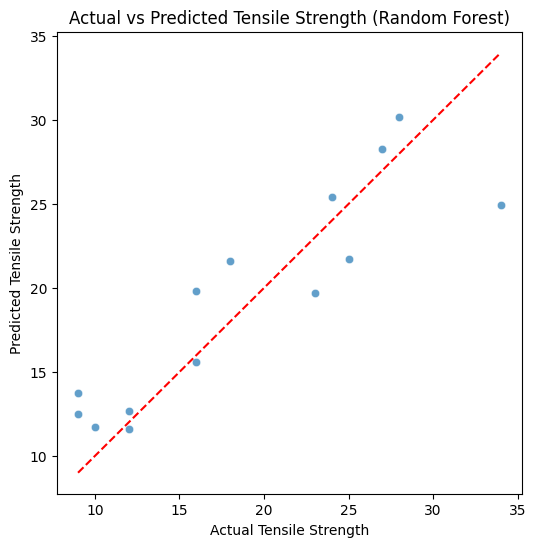

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions from the trained Random Forest model
rf_model = models["Random Forest Regression"]  # Retrieve the trained model
y_pred_rf = rf_model.predict(X_test)  # Make predictions

# Scatter plot: Actual vs. Predicted values
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("Actual vs Predicted Tensile Strength (Random Forest)")
plt.show()


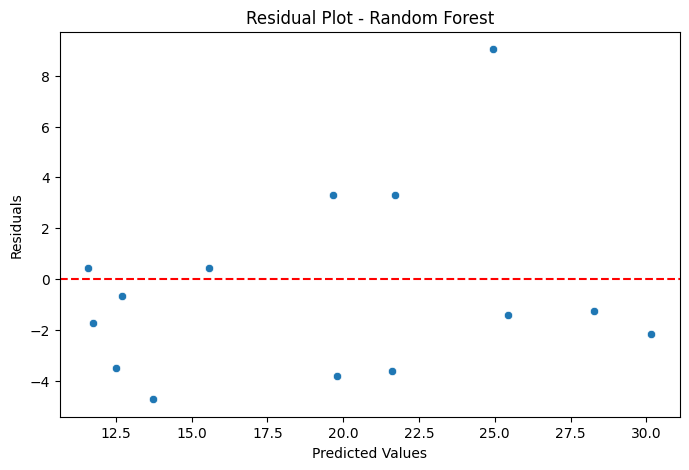

In [ ]:
import numpy as np

y_pred_rf = models["Random Forest Regression"].predict(X_test)
residuals = y_test - y_pred_rf  # Difference between actual and predicted

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Random Forest")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from io import StringIO
from google.colab import files

# Your trained model (assumes it’s in memory)
rf_model = models["Random Forest Regression"]

# Load the new dataset (removed duplicate header row)
data = """layer_height	wall_thickness	infill_density	nozzle_temperature	Bed_temperature	Print_speed	Material	Fan_speed	Tensile Strength
0.2	1.2	35	232.5	95	47.5	ABS	100
0.3	0.8	50	240	80	65	ABS	100
0.2	1.2	20	232.5	95	47.5	ABS	100
0.1	0.8	50	225	110	30	ABS	100
0.3	1.2	35	232.5	95	47.5	ABS	100
0.2	1.2	35	232.5	95	47.5	ABS	100
0.2	1.2	35	232.5	95	47.5	ABS	100
0.2	1.2	50	232.5	95	47.5	ABS	100
0.1	1.2	35	232.5	110	30	ABS	100
0.3	1.6	20	240	110	30	ABS	100
0.1	1.6	50	240	80	47.5	ABS	100
0.3	0.8	50	240	95	30	ABS	100
0.3	1.6	50	240	80	30	ABS	100
0.2	1.2	35	240	95	47.5	ABS	100
0.2	1.2	35	240	80	30	ABS	100
0.1	0.8	50	240	80	65	ABS	100
0.1	0.8	50	240	110	30	ABS	100
0.1	1.6	20	240	110	65	ABS	100
0.3	1.6	20	240	95	30	ABS	100
0.3	1.2	35	240	80	30	ABS	100
0.3	1.6	20	240	80	30	ABS	100
0.1	0.8	50	240	110	30	ABS	100
0.2	1.2	35	232.5	95	47.5	ABS	100
0.2	1.2	35	232.5	110	47.5	ABS	100
0.2	1.2	35	225	95	47.5	ABS	100
0.3	0.8	50	232.5	110	65	ABS	100
0.1	1.6	50	232.5	110	65	ABS	100
0.2	1.6	35	225	95	30	ABS	100
0.1	1.6	50	225	110	30	ABS	100
0.1	1.2	20	225	80	30	ABS	100
0.3	0.8	20	225	80	30	ABS	100
0.2	1.2	35	232.5	95	47.5	ABS	100
0.2	1.2	35	232.5	95	47.5	ABS	100
0.215	1.2	35	205	95	52.5	PLA	100
0.215	1.2	35	205	80	52.5	PLA	100
0.215	1.2	35	205	95	52.5	PLA	100
0.215	1.2	35	205	110	52.5	PLA	100
0.215	1.2	35	205	95	52.5	PLA	100
0.215	1.2	35	205	95	52.5	PLA	100
0.33	1.2	35	190	95	40	PLA	100
0.33	0.8	50	190	95	40	PLA	100
0.215	0.8	50	205	110	52.5	PLA	100
0.1	1.2	50	190	110	52.5	PLA	100
0.215	1.6	20	205	80	40	PLA	100
0.33	1.6	50	220	95	52.5	PLA	100
0.1	1.6	50	205	80	40	PLA	100
0.1	0.8	50	205	95	52.5	PLA	100
0.215	1.2	35	205	80	52.5	PLA	100
0.215	1.2	35	205	80	40	PLA	100
0.1	1.6	50	190	110	52.5	PLA	100
0.33	1.6	50	190	110	40	PLA	100
0.215	1.2	35	205	95	65	PLA	100
0.1	0.8	50	205	80	65	PLA	100
0.215	1.6	50	220	80	40	PLA	100
0.33	1.6	35	220	110	52.5	PLA	100
0.215	0.8	50	205	95	52.5	PLA	100
0.215	1.2	35	220	110	65	PLA	100
0.215	1.6	20	220	95	52.5	PLA	100
0.33	1.6	50	190	110	65	PLA	100
"""

# Convert the string data to a DataFrame
df_new = pd.read_csv(StringIO(data), sep='\t')
df_new.columns = df_new.columns.str.strip()  # Clean column names

# Debug: Check initial DataFrame
print("Initial df_new columns:", df_new.columns.tolist())
print("Initial df_new dtypes:\n", df_new.dtypes)

# Convert numeric columns explicitly
numeric_cols = ['layer_height', 'wall_thickness', 'infill_density', 'nozzle_temperature',
                'Bed_temperature', 'Print_speed', 'Fan_speed']
df_new[numeric_cols] = df_new[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Preprocess the new dataset
label_encoder = LabelEncoder()
df_new["Material"] = label_encoder.fit_transform(df_new["Material"])  # ABS -> 1, PLA -> 0

# Select only the features used in training (exclude 'Tensile Strength')
X_new = df_new.drop(columns=["Tensile Strength"]).select_dtypes(include=[np.number])

# Debug: Check X_new columns and dtypes
print("X_new columns after preprocessing:", X_new.columns.tolist())
print("X_new dtypes:\n", X_new.dtypes)

# Get the feature names the model was trained on
expected_features = rf_model.feature_names_in_
print("Features expected by the model:", expected_features)

# Ensure X_new matches the expected features
X_new = X_new[expected_features]  # Reorder and select only the expected columns

# Predict tensile strength using the trained Random Forest model
predictions = rf_model.predict(X_new)

# Add predictions to the DataFrame
df_new["Predicted_Tensile_Strength"] = predictions

# Display the first 5 predictions
print("\nFirst 5 predictions:")
print(df_new[['layer_height', 'wall_thickness', 'infill_density', 'nozzle_temperature',
              'Bed_temperature', 'Print_speed', 'Material', 'Predicted_Tensile_Strength']].head())

# Save the results to a CSV file
output_file = 'tensile_strength_predictions_new.csv'
df_new.to_csv(output_file, index=False)

print(f"\nPredictions have been saved to '{output_file}'")
print("You can download this file containing all features and predicted tensile strength values.")

# Download the file in Colab
files.download(output_file)

Initial df_new columns: ['layer_height', 'wall_thickness', 'infill_density', 'nozzle_temperature', 'Bed_temperature', 'Print_speed', 'Material', 'Fan_speed', 'Tensile Strength']
Initial df_new dtypes:
 layer_height          float64
wall_thickness        float64
infill_density          int64
nozzle_temperature    float64
Bed_temperature         int64
Print_speed           float64
Material               object
Fan_speed               int64
Tensile Strength      float64
dtype: object
X_new columns after preprocessing: ['layer_height', 'wall_thickness', 'infill_density', 'nozzle_temperature', 'Bed_temperature', 'Print_speed', 'Material', 'Fan_speed']
X_new dtypes:
 layer_height          float64
wall_thickness        float64
infill_density          int64
nozzle_temperature    float64
Bed_temperature         int64
Print_speed           float64
Material                int64
Fan_speed               int64
dtype: object
Features expected by the model: ['layer_height' 'wall_thickness' 'infill_den

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>